In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/ad_click_dataset.csv")
df

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,NaN,NaN,Mobile,Top,Education,NaN,0
9996,7843,User7843,NaN,Female,Desktop,Bottom,Entertainment,NaN,0
9997,3914,User3914,NaN,Male,Mobile,Side,NaN,Morning,0
9998,7924,User7924,NaN,NaN,Desktop,NaN,Shopping,Morning,1


In [166]:
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [168]:
df.shape

(10000, 9)

In [170]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


,id,age,click
count,10000.000000,5234.000000,10000.000000
mean,5060.211400,40.197363,0.650000
std,2861.758265,13.126420,0.476993
min,5.000000,18.000000,0.000000
25%,2529.000000,29.000000,0.000000
50%,5218.000000,39.500000,1.000000
75%,7466.000000,52.000000,1.000000
max,10000.000000,64.000000,1.000000


In [178]:
# Check for missing values
df.isnull().sum()

id                  0
full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64

In [174]:
# 1. Impute age with median (NOT forward fill)
df['age'] = df['age'].fillna(df['age'].median())

# 2. Impute categorical features with mode (or 'Unknown' if mode doesn't make sense)
for col in ['gender', 'device_type', 'ad_position', 'time_of_day']:
    df[col] = df[col].fillna(df[col].mode()[0])

# 3. Handle browsing_history
# 🔍 First check if it’s categorical or numeric
print(df['browsing_history'].unique()[:10])


['Shopping' nan 'Education' 'Entertainment' 'Social Media' 'News']


In [180]:
df['browsing_history'] = df['browsing_history'].fillna('Trends')

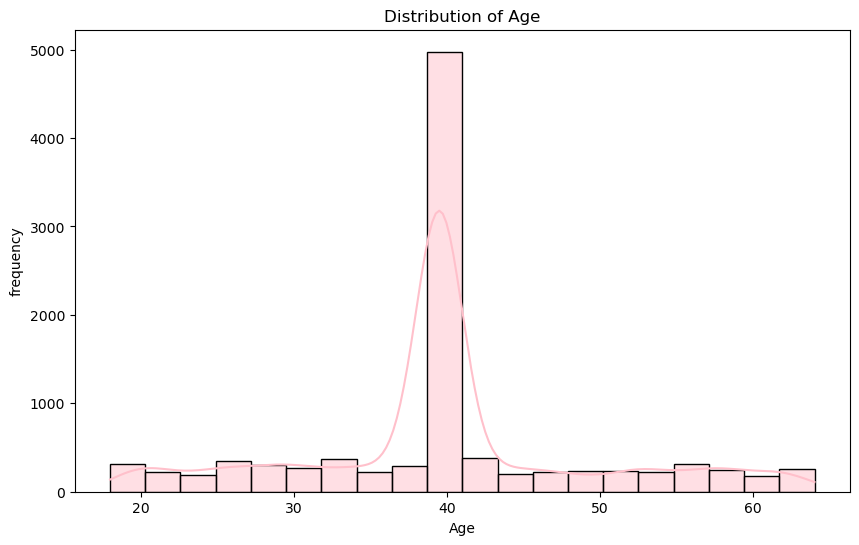

In [182]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='pink')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

<Axes: xlabel='age'>

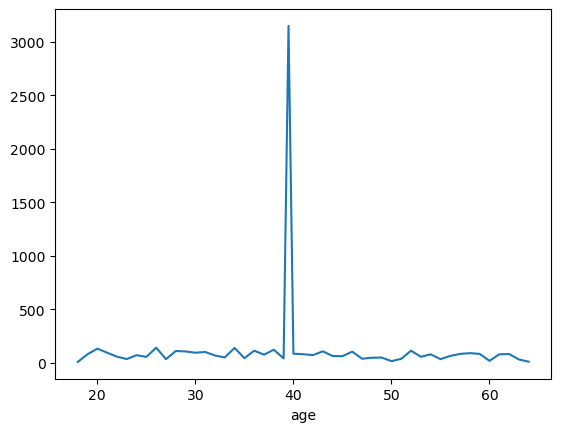

In [184]:
df.groupby('age')['click'].sum().plot()

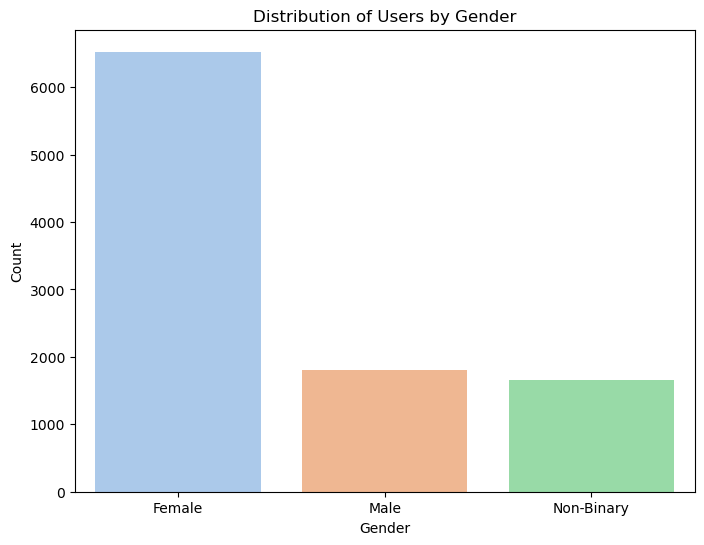

In [186]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Distribution of Users by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='gender'>

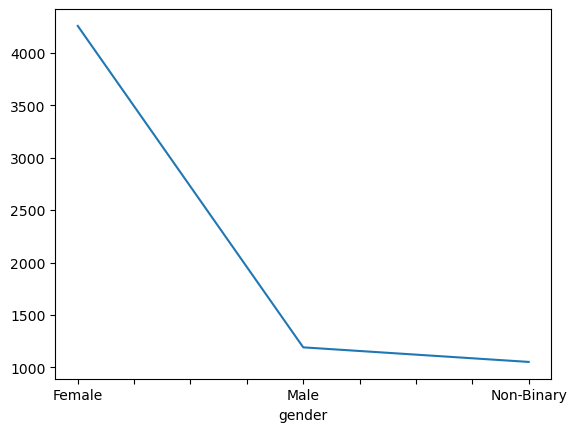

In [188]:
df.groupby('gender')['click'].sum().plot()

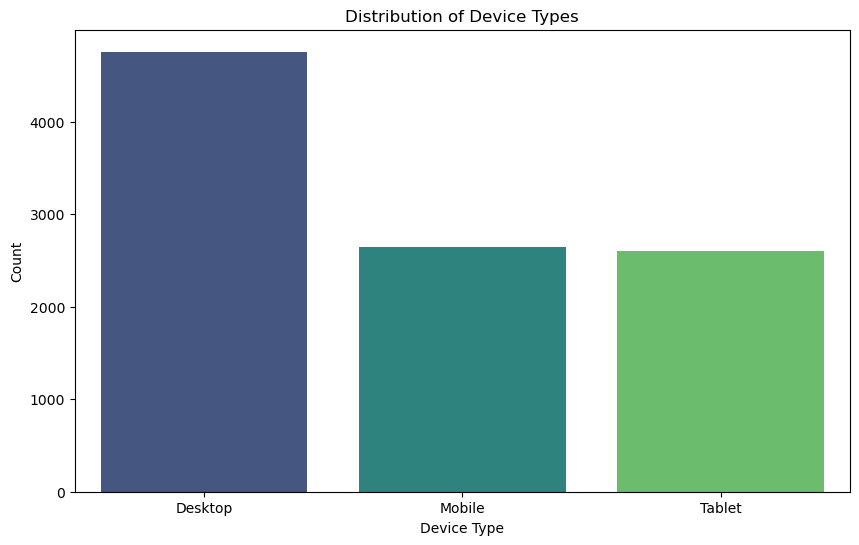

In [190]:
plt.figure(figsize=(10, 6))
sns.countplot(x='device_type', data=df, palette='viridis')
plt.title('Distribution of Device Types')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='device_type'>

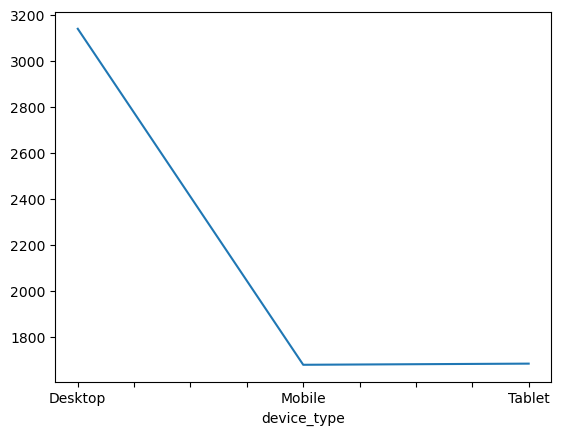

In [192]:
df.groupby('device_type')['click'].sum().plot()

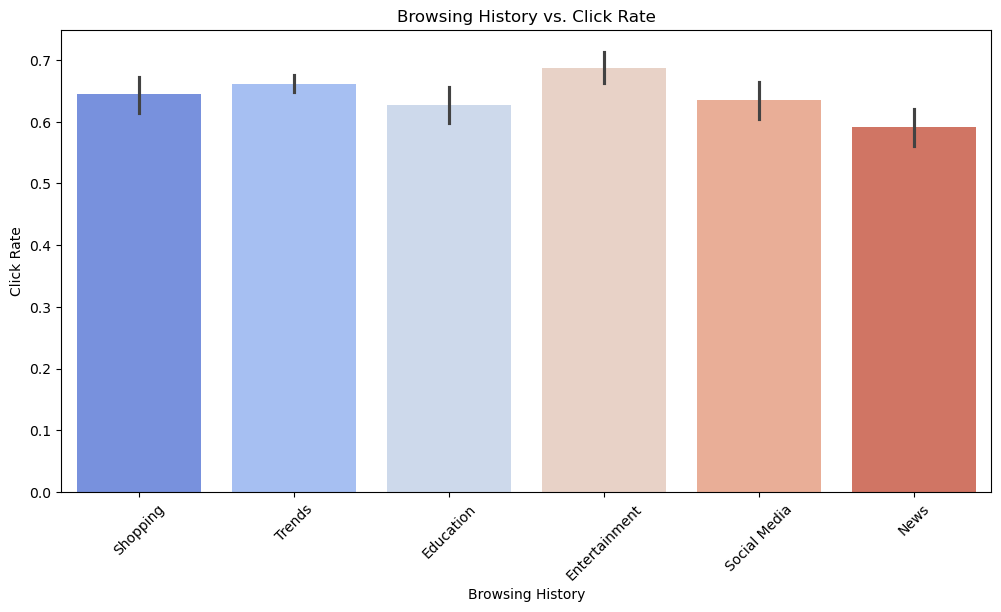

In [194]:
plt.figure(figsize=(12, 6))
sns.barplot(x='browsing_history', y='click', data=df, palette='coolwarm')
plt.title('Browsing History vs. Click Rate')
plt.xlabel('Browsing History')
plt.ylabel('Click Rate')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='browsing_history'>

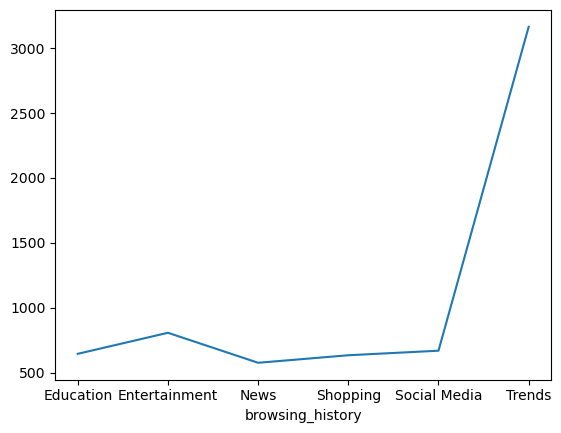

In [196]:
df.groupby('browsing_history')['click'].sum().plot()

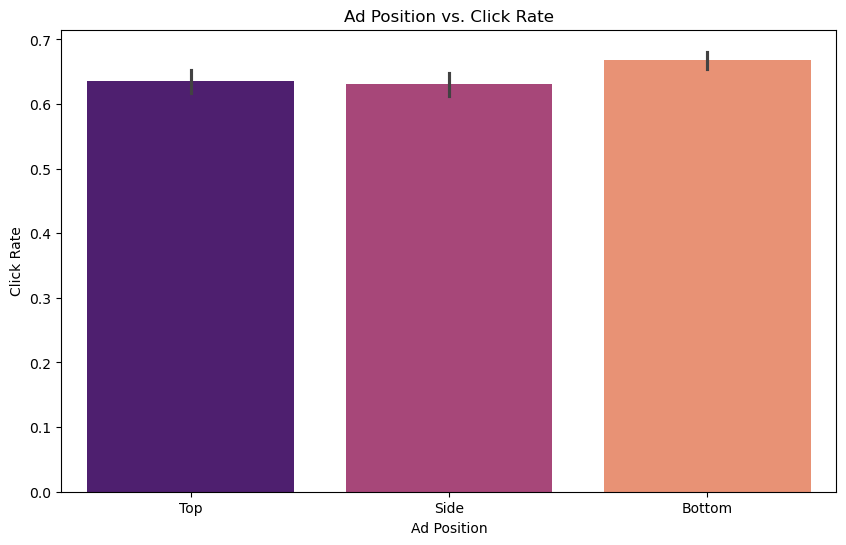

In [198]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ad_position', y='click', data=df, palette='magma')
plt.title('Ad Position vs. Click Rate')
plt.xlabel('Ad Position')
plt.ylabel('Click Rate')
plt.show()

<Axes: xlabel='ad_position'>

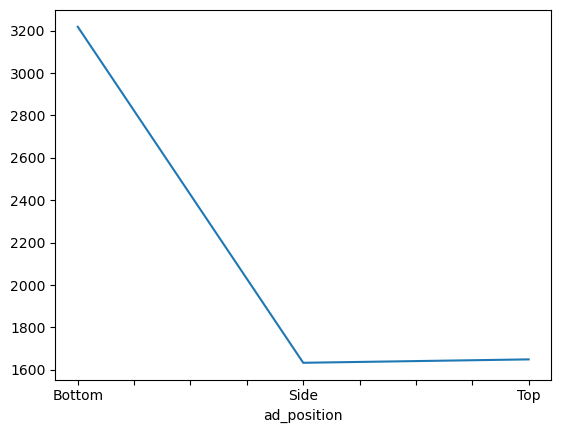

In [200]:
df.groupby('ad_position')['click'].sum().plot()

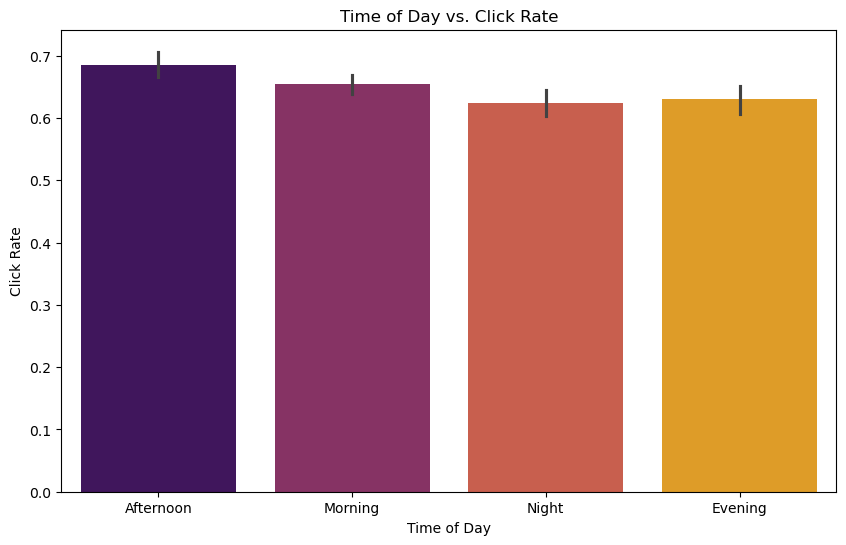

In [202]:
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='click', data=df, palette='inferno')
plt.title('Time of Day vs. Click Rate')
plt.xlabel('Time of Day')
plt.ylabel('Click Rate')
plt.show()

<Axes: xlabel='time_of_day'>

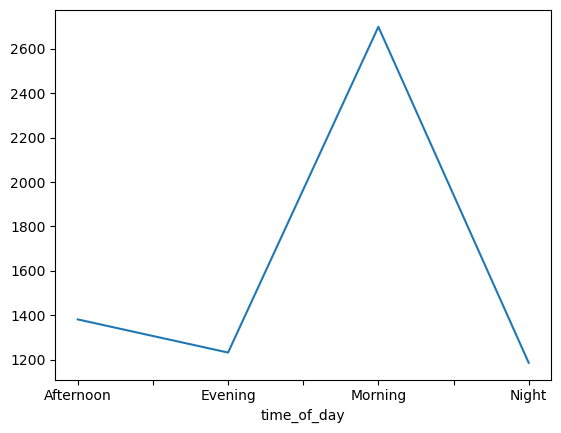

In [204]:
df.groupby('time_of_day')['click'].sum().plot()

In [206]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Convert categorical columns to numeric
df['gender'] = le.fit_transform(df['gender'])
df['device_type'] = le.fit_transform(df['device_type'])
df['ad_position'] = le.fit_transform(df['ad_position'])
df['browsing_history'] = le.fit_transform(df['browsing_history'])
df['time_of_day'] = le.fit_transform(df['time_of_day'])

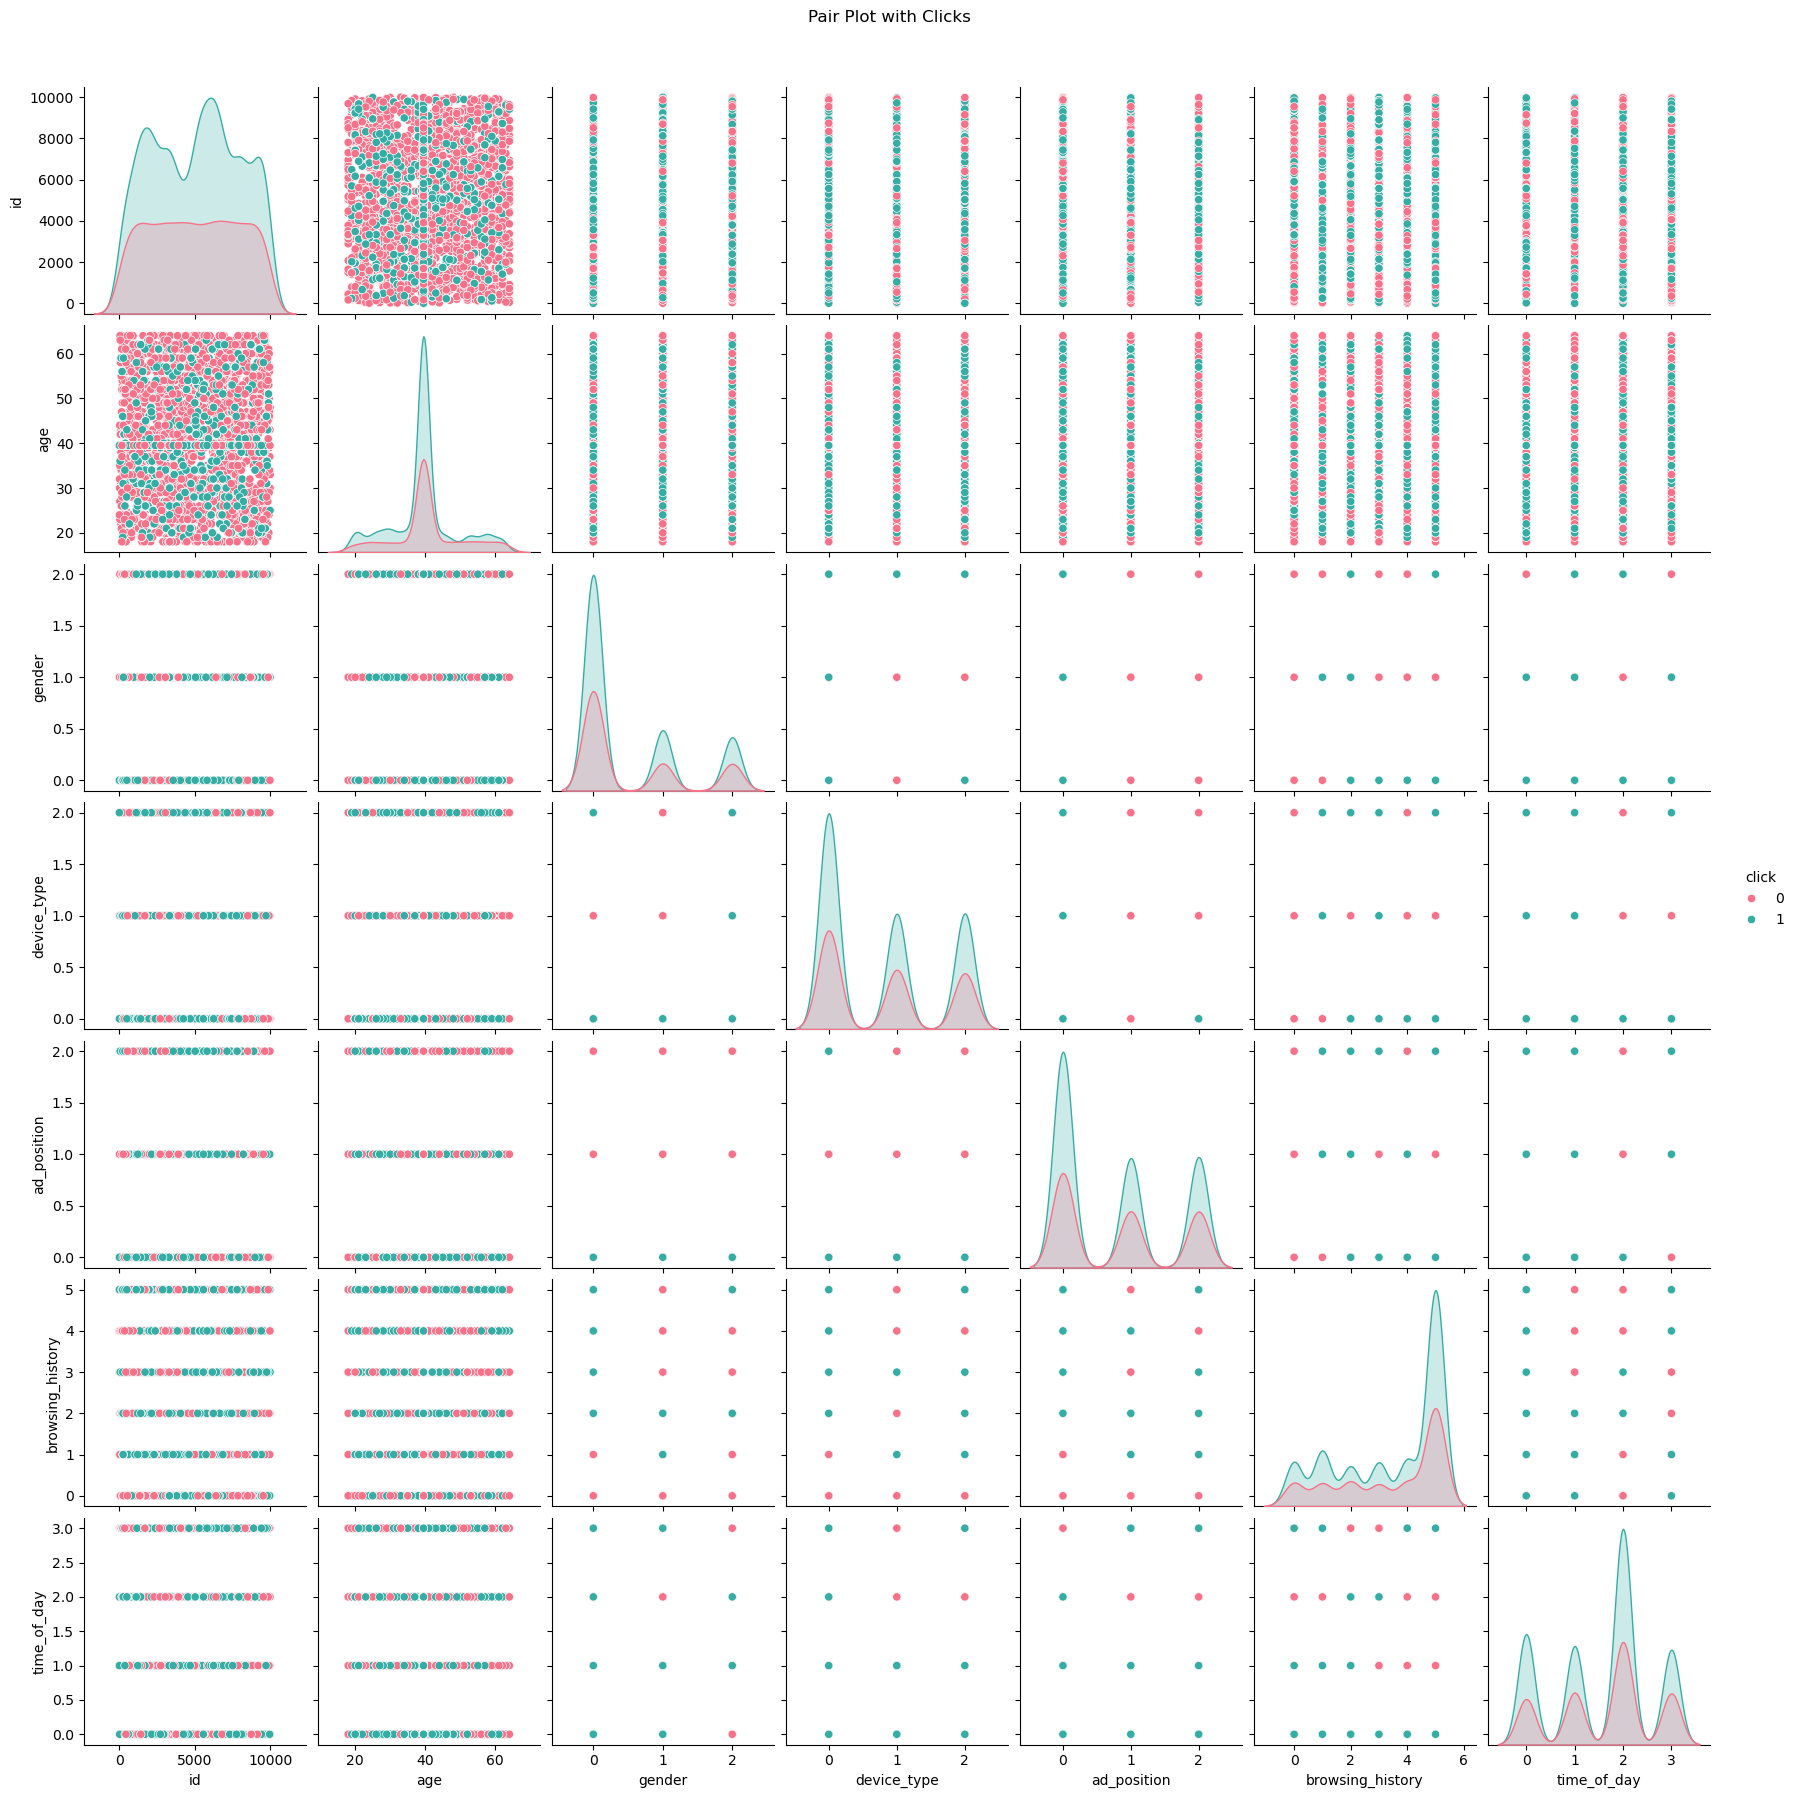

In [208]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns for pair plot
df_encoded = df.copy()
categorical_columns = ['device_type', 'ad_position', 'browsing_history', 'time_of_day']

for column in categorical_columns:
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

# Plot pair plots
sns.pairplot(df_encoded, hue='click', palette='husl')
plt.suptitle('Pair Plot with Clicks', y=1.03)
plt.show()

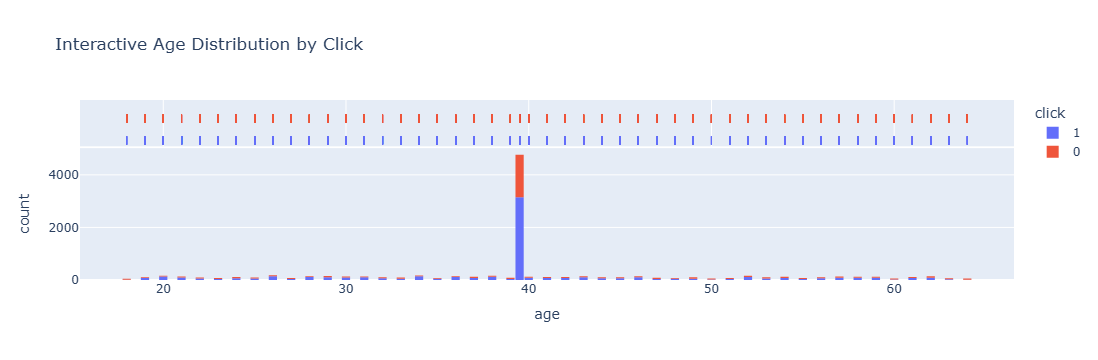

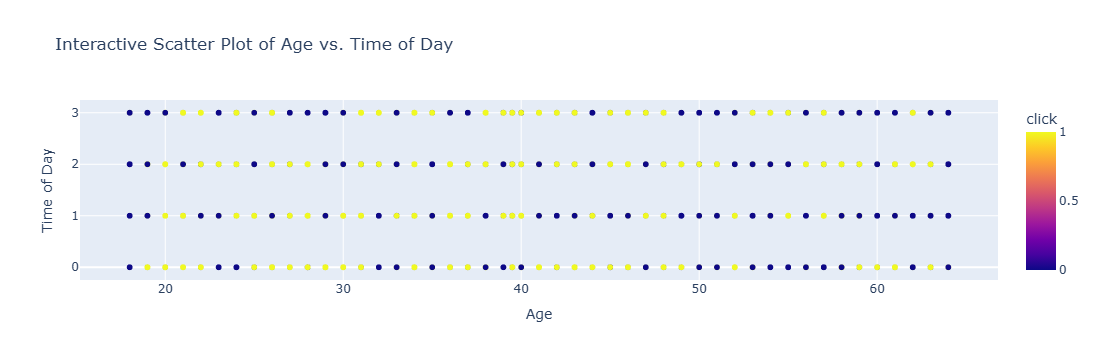

In [210]:
import plotly.express as px

# Interactive histogram of age
fig = px.histogram(df, x='age', color='click', marginal='rug', title='Interactive Age Distribution by Click')
fig.update_layout(bargap=0.1)
fig.show()

# Interactive scatter plot of age vs. time of day
fig = px.scatter(df, x='age', y='time_of_day', color='click', title='Interactive Scatter Plot of Age vs. Time of Day')
fig.update_layout(xaxis_title='Age', yaxis_title='Time of Day')
fig.show()

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [214]:
# Encode categorical variables
label_encoders = {}
for column in ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Check the first few rows after encoding
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,0,0,2,3,0,1
1,3044,User3044,39.5,1,0,2,5,2,1
2,5912,User5912,41.0,2,0,1,0,3,1
3,5418,User5418,34.0,1,0,0,1,1,1
4,9452,User9452,39.0,2,0,0,4,2,0


In [216]:
# Define features and target variable
X = df.drop(columns=['id', 'full_name', 'click'])
y = df['click']

In [218]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

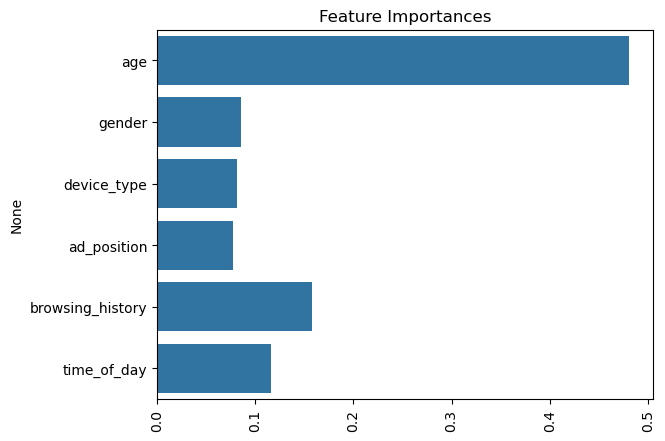

In [142]:
importances = best_model.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.show()


In [144]:
from sklearn.impute import SimpleImputer
# Initialize the imputer with a strategy, e.g., mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data
X_test_imputed = imputer.transform(X_test)

print(X_test)
print(X_train)

       age  gender  device_type  ad_position  browsing_history  time_of_day
6252  44.0       0            0            2                 3            2
4684  39.5       0            0            2                 1            2
1731  57.0       0            0            0                 5            0
4742  39.5       1            2            1                 5            1
4521  57.0       1            1            0                 1            3
...    ...     ...          ...          ...               ...          ...
6412  39.5       0            0            0                 5            3
8285  39.5       0            0            0                 3            2
7853  39.5       0            0            0                 3            2
1095  63.0       0            0            1                 5            1
6929  39.5       2            1            0                 5            2

[2000 rows x 6 columns]
       age  gender  device_type  ad_position  browsing_history 

#  USING IT IMPROVED THE ACCURACY 

In [220]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [223]:
# Define features and target variable
X = df.drop(columns=['id', 'full_name', 'click'])
y = df['click']

In [225]:
# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔁 Handle Class Imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 🔄 Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [227]:
# 🧠 Model Training and Hyperparameter Tuning (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Grid Search with 5-fold cross-validation
grid = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train_res)

# Best model
best_model = grid.best_estimator_
print("✅ Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
✅ Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.59      0.58       705
           1       0.77      0.76      0.77      1295

    accuracy                           0.70      2000
   macro avg       0.67      0.68      0.68      2000
weighted avg       0.70      0.70      0.70      2000



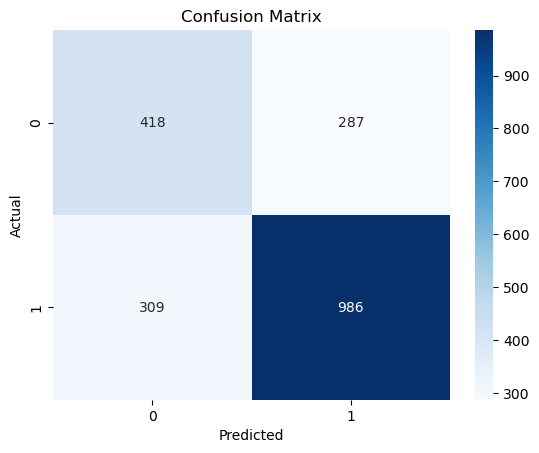

🔍 Accuracy Score: 0.7020


In [228]:
# 📈 Evaluate on test data
y_pred = best_model.predict(X_test_scaled)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy
from sklearn.metrics import accuracy_score
print(f"🔍 Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
